# Assignment 1 - Identify Incentivised Reviews

## 1. Exploratory Data Analysis
### 1.1 Word Cloud
To analyse what differentiates incentivised reviews from a normal review, let's analyse the most common words that appear in the given training dataset "incentivised_examples" using word cloud 

In [2]:
#load incentivised reviews csv 
fakeReviews=pd.read_csv(r"C:\Users\liewm\Documents\BT4222 Mining Web Data\Assignment 1\incentivized_examples.csv")
fakeReviews.head()

C:\Users\liewm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,review_no,review_body,discount_text
0,1.0,such a delicate and lovely piece of jewelry th...,disclaimer i received this item for free in ex...
1,2.0,this is a beautiful piece and comes with a lov...,i received a sample for review.
2,3.0,"this seemed kinda cheep for 10. i like it,but ...",got it free to review
3,4.0,as usual i received this item for free in exch...,i received this item for free in exchange for ...
4,5.0,i am a lover of jewelry and i have the jewelry...,when i received thesterling silver 1mm nickel ...


In [3]:
# Start with loading all necessary libraries
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


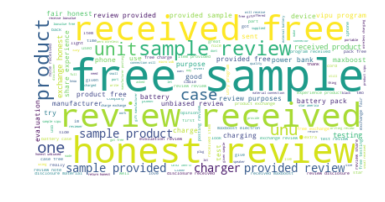

In [4]:
#load all the discount text into text variable 
fakeReviews['discount_text']=fakeReviews["discount_text"].fillna('')
text = " ".join(str(review) for review in fakeReviews.discount_text)
#using the stopwords available in python 
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 1.2 Analysis of word cloud 
The most common words are :
- free
- sample
- received
- review
- honest
- sample product
- sample provided
- sample review
- evaluation
- product 
- provided review/review provided

### 1.3 Count of sentences
Word cloud only shows most common phrases/words that often appears in incentivised reviews. In this section, we would like to explore more by analysing the most frequent sentences that occurs in incentivised reviews.

In [7]:
import collections
wordcount = {}
# To eliminate duplicates, remove punctuation
for word in fakeReviews.discount_text: #for every sentence in the discount_text column 
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")

    if word not in stopwords: #if the sentence is not entirely unnecessary words 
        if word not in wordcount: #if the sentence is not found in the wordcount 
            wordcount[word] = 1 
        else:
            wordcount[word] += 1
# Print most common word

word_counter = collections.Counter(wordcount) #count how many times the exact same sentence appear 
for word, count in word_counter.most_common(50): #sentence, count of sentence --> see the top 50 most frequent sentences  
    print(word, ": ", count)


 :  1047040
sample provided for review :  28
disclosure of material connection i will receive a lowvalue free gift from the manufacturer for posting this review :  16
provided for review  :  14
i received a free sample for review and to share my experience with this product from the vipu program :  10
 this product was provided to me free of charge in exchange for my honest review :  10
a sample of this product was sent to me for review purposes :  7
i received a free sample for review purposes from the manufacturer :  7
review sample :  5
note i was sent a free product sample for review :  5
i was provided this product in exchange of a fair and honest review :  4
disclosure i received a sample product from the manufacturer for the purposes of providing this review a review in exchange for the review sample was not promised the views and opinions expressed in this review are my own and in no way represent the views or opinions of the manufacturer or vendor :  4
i was provided with a fr

### 1.4 Analysis of the most frequent sentences 
Some examples of most common pattern of sentences are: 

#### 1.4.1 receive/provide/sent/given/offer/email/supplied...review
- i will receive...free gift from the manufacturer for the review
- sent/received a free sample for review
- receive sample for review
- i received a sample product from the manufacturer for the purposes of providing this review!
- i received this unit for review!
- i received this at no cost in exchange for writing a review!

#### 1.4.2 (sample/freebie/product/item/unit/coupon/coupon code) was (provided/given/sent/received)...review/evaluation/testing/feedback
- a sample of this product was sent to me for review purposes
- sample provided for review 
- the product was received for free
- (was provided this product/review sample)/(product was provided) (free of charge in exchange) for (testing/my honest review/evaluation)
- sample item provided by the distributor for evaluation review !
- was provided with a free copy of this item for testing and my fair and honest evaluation!
- was provided a case/an evaluation copy....for testing and review 
- was given this item for review 

#### 1.4.3 review sample/sample reivew/ review unit
- (free) item/unit/sample/product/product sample/ testing unit
- free copy of this item
- review sample/sample review/review unit,
- free/at no cost/at no charge/complimentary

#### 1.4.4 obtain/receive/given...for free
- disclosureobtained from manufacturerpayment free

#### 1.4.5 item/sample/product/unit/coupon... at no charge/free/at no cost/exchange/return 
-	this product was provided to me free of charge in exchange for my honest review
-	as usual i received this unit free for review
-	this product was provided to me in exchange for an honest review
-	note i was given a free product to test in return for an honest review

#### 1.4.6 (free/complimentary) (sample/product/unit) 



## 2. NLP using Regular Expression

### 2.1 Import Original Data

In [8]:
#loading data 
import pandas as pd
df=pd.read_csv(r"C:\Users\liewm\Documents\BT4222 Mining Web Data\Assignment 1\s118W7SzepTN")
df.head()

,review_no,review_body
0,1180994,Easy to set up. Quiet Easy to empty.
1,103517,Nickelback is one of those bands that critics ...
2,1954143,I purchased this drive from Newegg in August 2...
3,1835995,grand kids love it
4,1504112,I bought these because I wanted to try and use...


In [ ]:
#remove na values 
df["review_body"]=df["review_body"].fillna('')

### 2.2 Regex Patterns 
#### 2.2.1 (sample/freebie\free product/free unit)...review/evaluation/feedback/testing
- sample provided for review 
- sample for testing 

In [61]:
#Eg: sample was provided for review, sample was given in exchange for honest review
#take away alternative for sample: freebie, gift 
#query1=df[df["review_body"].str.contains(r'(?i)(sample|freebie|product|item|unit|coupon).*?(receive|provide|sen(d|t)|give|offer|email|suppl(y|ied)).*?(review|evaluation|feedback|testing)',regex=True)]
query1=df[df["review_body"].str.contains(r'(?i)(\bsample\b|freebie|free (product|unit|item|coupon)).*?(free|at no (cost|charge)|review|evaluation|feedback|testing)',regex=True)]
print(query1.shape)

C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


(14411, 2)


In [62]:
print(query1.head())
#extract only the sentence that contains the criteria
query1['discount_text'] = query1['review_body'].str.extract(r'(I received)')#testing if it works 
#[^\\.\;\?\!\<\>]* was added in between each word, so as to only extract the sentence that matches the criteria and ends before & after punctuation

query1['discount_text'] = query1['review_body'].str.extract(r'(?i)[^\\.\;\?\!\<\>]*((\bsample\b|freebie|free (product|unit|item|coupon)).*?(free|at no (cost|charge)|review|evaluation|feedback|testing))[^\\.\;\?\!\<\>]*')

      review_no                                        review_body
154     3048834  This vitamin C serum has given me excellent re...
234     3087327  I’m very pleased with this yoga mat mainly due...
352     3336059  This loaf pan gives the term, &#34;floppy&#34;...
882     2515976  Free product provided for evaluation and revie...
1153     979611  I'm not exactly a sheets connoisseur--I don't ...


C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
query1.head(10)

,review_no,review_body,discount_text
154,3048834,This vitamin C serum has given me excellent re...,sample for testing
234,3087327,I’m very pleased with this yoga mat mainly due...,Sample provided for review
352,3336059,"This loaf pan gives the term, &#34;floppy&#34;...",sample to test for this review
882,2515976,Free product provided for evaluation and revie...,Free product provided for evaluation
1153,979611,I'm not exactly a sheets connoisseur--I don't ...,Sample provided for review
1294,1603553,"This little stand measures only 4\\"" x 3\\"" x ...",sample for review
1533,3260968,This is a cute looking timer. I like the tomat...,Sample provided for review
1700,744422,UAG cases have a military / utilitarian look t...,sample units for both the iPhone 6 and 6 Plus ...
1812,1763451,If you want an affordable set of IEMs or earbu...,Sample provided for review
2193,3104996,[[VIDEOID:mo2HOFGJQPZ95QD]]This is a review of...,sample for review


#### 2.2.2 (product/unit/item/coupon) (is/are/was/were)* (provided/emailed/given/sent/supplied/received)...free/at no cost/charge/ review/testing/evaluation/feedback
- Product was provided by the manufacturer for review 
- Item provided with no charge

In [64]:
query2=df[df["review_body"].str.contains(r'(?i)(product|unit|item|coupon)\s(is|are|was|were)*\s*(receive|provide|sen(d|t)|g(e|o)t|give|offer|email|suppl(y|ied)|obtain).*?(free|at no (cost|charge)|review|evaluation|feedback|testing)',regex=True)]
print(query2.shape)

C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(4299, 2)


In [65]:
print(query2.head())
#extract only the sentence that contains the criteria
query2['discount_text'] = query2['review_body'].str.extract(r'(I received)')#testing if it works 
#[^\\.\;\?\!\<\>]* was added in between each word, so as to only extract the sentence that matches the criteria and ends before & after punctuation
query2['discount_text'] = query2['review_body'].str.extract(r'(?i)[^\\.\;\?\!\<\>]*((product|unit|item|coupon)\s(is|are|was|were)*\s*(receive|provide|sen(d|t)|g(e|o)t|give|offer|email|suppl(y|ied)|obtain).*?(free|at no (cost|charge)|review|evaluation|feedback|testing))[^\\.\;\?\!\<\>]*')

      review_no                                        review_body
381     2589504  These kitchen scissors are made from stainless...
882     2515976  Free product provided for evaluation and revie...
1033     503724  RFID Blocking Leather Wallet for Women<br /><b...
1152     587858  [[VIDEOID:cc0c73475ddf036360d171989d7fd21f]]Th...
1299    2846705  After a bout with the flu my daughter and gran...


C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [66]:
print(query2.head())

      review_no                                        review_body  \
381     2589504  These kitchen scissors are made from stainless...   
882     2515976  Free product provided for evaluation and revie...   
1033     503724  RFID Blocking Leather Wallet for Women<br /><b...   
1152     587858  [[VIDEOID:cc0c73475ddf036360d171989d7fd21f]]Th...   
1299    2846705  After a bout with the flu my daughter and gran...   

                                          discount_text  
381   product was provided by the manufacturer.  Thi...  
882                     product provided for evaluation  
1033                    product was provided at no cost  
1152                    product was provided for review  
1299               Product received for a honest review  


#### 2.2.3 Find words that contain : review sample/freebie, product sample, evaluation copy, free copy
Note : review product/unit is not included as it could be a normal review on the product

In [35]:
#Eg : review sample/ review unit/ sample review 
query3=df[df["review_body"].str.contains(r'(?i)(review (sample|freebie)|(sample|freebie) review|(product|unit|item) sample|sample (product|unit|item)|evaluation copy|free copy)',regex=True)]
print(query3.shape)


C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


(3792, 2)


In [36]:
print(query3.head())
#extract only the sentence that contains the criteria
query3['discount_text'] = query3['review_body'].str.extract(r'(I received)')#testing if it works 
#[^\\.\;\?\!\<\>]* was added in between each word, so as to only extract the sentence that matches the criteria and ends before & after punctuation
query3['discount_text'] = query3['review_body'].str.extract(r'(?i)[^\\.\;\?\!\<\>]*(review (sample|freebie)|(sample|freebie) review|(product|unit|item) sample|sample (product|unit|item)|evaluation copy|free copy)[^\\.\;\?\!\<\>]*')

      review_no                                        review_body
206     2230000  It does charge faster, but so do other cables....
699     2061167  I was in the mood to hear some Chuck Mangione ...
1700     744422  UAG cases have a military / utilitarian look t...
2014    2560983  ***Disclaimer: I received a free copy in excha...
3769    2065480  This is a good simple compact reasonably price...


C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [37]:
print(query3.head(10))

      review_no                                        review_body  \
206     2230000  It does charge faster, but so do other cables....   
699     2061167  I was in the mood to hear some Chuck Mangione ...   
1700     744422  UAG cases have a military / utilitarian look t...   
2014    2560983  ***Disclaimer: I received a free copy in excha...   
3769    2065480  This is a good simple compact reasonably price...   
3895    2531054  [Update: Ten months of occasional use later, t...   
4216    1754881  I feel kinda' sheepish saying this, but it's r...   
4222    2678627  From a perfect start—“Oh Yuck! Sweetie, did we...   
5109    2917353  The PowerAdd USB adapter is a good looking com...   
5371    1099221  This is really neat stuff!  And it works surpr...   

       discount_text  
206   sample product  
699   sample product  
1700     sample unit  
2014       free copy  
3769   review sample  
3895   review sample  
4216  sample product  
4222       free copy  
5109   review sample  

#### 2.2.4 receive/provide/sent....product/unit/item/coupon...for review
- I received this product from manufacturer for review
<br><br>
Note: we want to restrict it to only one sentence, does not contain sentences such as "I purchase and got this product. I give positive review" 



In [91]:
query4=df[df["review_body"].str.contains(r'(?i)(receive|provided|sent|g(e|o)t|given|offered|emailed|supplied|obtain)\s*\w*\s*(sample|freebie|product|unit|item|coupon).*?(at no (charge|cost)|free|review|evaluation|feedback|testing)',regex=True)]
print(query4.shape)

C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(4174, 2)


In [92]:
print(query4.head())
#extract only the sentence that contains the criteria
query4['discount_text'] = query4['review_body'].str.extract(r'(I received)')#testing if it works 
#[^\\.\;\?\!\<\>]* was added in between each word, so as to only extract the sentence that matches the criteria and ends before & after punctuation
query4['discount_text'] = query4['review_body'].str.extract(r'(?i)[^\\.\;\?\!\<\>]*((receive|provided|sent|g(e|o)t|given|offered|emailed|supplied|obtain)\s*\w*\s*(sample|freebie|product|unit|item|coupon).*?(at no (charge|cost)|free|review|evaluation|feedback|testing))[^\\.\;\?\!\<\>]*')

      review_no                                        review_body
682     2307543  Meghan Hill has written an immensely useful bo...
1700     744422  UAG cases have a military / utilitarian look t...
2390    1111561  [[VIDEOID:97b853dc7f888a7bcfad544c58d2aff0]] I...
2546    3249583  This is a very sweet set for any young child. ...
2587     534244  [[VIDEOID:ae2c0519e5c60c16b7db168b12d4937d]]Th...


C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [93]:
print(query4.head(10))

      review_no                                        review_body  \
682     2307543  Meghan Hill has written an immensely useful bo...   
1700     744422  UAG cases have a military / utilitarian look t...   
2390    1111561  [[VIDEOID:97b853dc7f888a7bcfad544c58d2aff0]] I...   
2546    3249583  This is a very sweet set for any young child. ...   
2587     534244  [[VIDEOID:ae2c0519e5c60c16b7db168b12d4937d]]Th...   
2961    3504448  This is a thick men's belt that come ready for...   
2970     175155  We like to add some heat to our meals in my fa...   
3194    2075193  This OxyLED motion detecting light works as ad...   
3533      37111  This is one of the best razors I have used han...   
3549     487059  OK, I am a retired IT guy. But, after a little...   

                                          discount_text  
682          sent this product in exchange for a review  
1700  received sample units for both the iPhone 6 an...  
2390                      provided a sample for testing

#### 2.2.5 Special Case
- i receive this...for free 


In [94]:
query5=df[df["review_body"].str.contains(r'(?i)(receive|provided|sent|g(e|o)t|given|offered|emailed|supplied|obtain)\s(this|these)\s*\w*\s*(at no (charge|cost)|free|review|evaluation|testing|feedback)',regex=True)]
print(query5.shape)

C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


(982, 2)


In [95]:
print(query5.head())
#extract only the sentence that contains the criteria
query5['discount_text'] = query5['review_body'].str.extract(r'(I received)')#testing if it works 
#[^\\.\;\?\!\<\>]* was added in between each word, so as to only extract the sentence that matches the criteria and ends before & after punctuation
query5['discount_text'] = query5['review_body'].str.extract(r'(?i)[^\\.\;\?\!\<\>]*((receive|provided|sent|g(e|o)t|given|offered|emailed|supplied|obtain)\s(this|these)\s*\w*\s*(at no (charge|cost)|free|review|evaluation|testing|feedback))[^\\.\;\?\!\<\>]*')

       review_no                                        review_body
1022     2796345  I got these for free thanks to Schick and I'm ...
4235     1272814  I like pens in all their variations. I tend to...
5650     1352531  I play the Great Highland Bagpipe.  Some of my...
13518    1105748  I got this bag free with a Canon DSLR purchase...
14582    1258029  [[VIDEOID:75611311205e9e15552da273ed9475e6]]It...


C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\liewm\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [96]:
print(query5.head(10))

       review_no                                        review_body  \
1022     2796345  I got these for free thanks to Schick and I'm ...   
4235     1272814  I like pens in all their variations. I tend to...   
5650     1352531  I play the Great Highland Bagpipe.  Some of my...   
13518    1105748  I got this bag free with a Canon DSLR purchase...   
14582    1258029  [[VIDEOID:75611311205e9e15552da273ed9475e6]]It...   
16811    1803539  I was given this for free to test and write a ...   
18257    1734645  The hard plastic earpiece hurts after a short ...   
23610    2009871  I got this product free from Gillette to revie...   
25027    1896536  My 9 year old son seems to get car sick a lot....   
25198    2153618  Smith is young and it shows in his writing. Th...   

                  discount_text  
1022         got these for free  
4235     given these for review  
5650   offered these for review  
13518         got this bag free  
14582     get this product free  
16811       gi

## 3. Data Consolidation 
### 3.1 Concatenate all dataframes containing computed incentivised reviews

In [97]:
#at the end need to concatenate, then remove duplicates 
finaldata=pd.concat([query1, query2, query3, query4, query5])
print(finaldata.shape)
print(finaldata.head())

(27658, 3)
      review_no                                        review_body  \
154     3048834  This vitamin C serum has given me excellent re...   
234     3087327  I’m very pleased with this yoga mat mainly due...   
352     3336059  This loaf pan gives the term, &#34;floppy&#34;...   
882     2515976  Free product provided for evaluation and revie...   
1153     979611  I'm not exactly a sheets connoisseur--I don't ...   

                             discount_text  
154                     sample for testing  
234             Sample provided for review  
352         sample to test for this review  
882   Free product provided for evaluation  
1153            Sample provided for review  


### 3.2 Remove Duplicates
Since there could be duplicated/similar results due to overlap of query, we need to remove duplicates based on the primary key review_no

In [98]:
#remove duplicates 
finaldata.drop_duplicates(subset ="review_no", 
                     keep = False, inplace = True)
finaldata.shape

(18445, 3)

### 3.3 Drop rows in (discount_text) if there is NA value

In [99]:
#remove empty na values in discount_text
finaldata.dropna(subset=['discount_text'])
finaldata.shape

(18445, 3)

### 3.4 Remove column review_body

In [100]:
#remove column review_body
del finaldata['review_body']
finaldata.shape
finaldata.head()

,review_no,discount_text
154,3048834,sample for testing
234,3087327,Sample provided for review
352,3336059,sample to test for this review
1153,979611,Sample provided for review
1294,1603553,sample for review


### 3.5 Transfer the output to result csv

In [101]:
#transfer to csv
finaldata.to_csv(r'C:\Users\liewm\Documents\BT4222 Mining Web Data\Assignment 1\result.csv')